Generate Coulomb Fit from Diamond Miner

   ivvi_P  ivvi_S  keithley2000_current
0     0.6  2000.0          4.358676e-09
1     0.6  1960.0          4.303679e-09
2     0.6  1920.0          4.238043e-09
3     0.6  1880.0          4.164323e-09
4     0.6  1840.0          4.093141e-09
      ivvi_P  ivvi_S  keithley2000_current
5853   0.258 -1840.0         -3.632447e-09
5854   0.258 -1880.0         -3.721484e-09
5855   0.258 -1920.0         -3.856578e-09
5856   0.258 -1960.0         -3.926622e-09
5857   0.258 -2000.0         -3.989714e-09


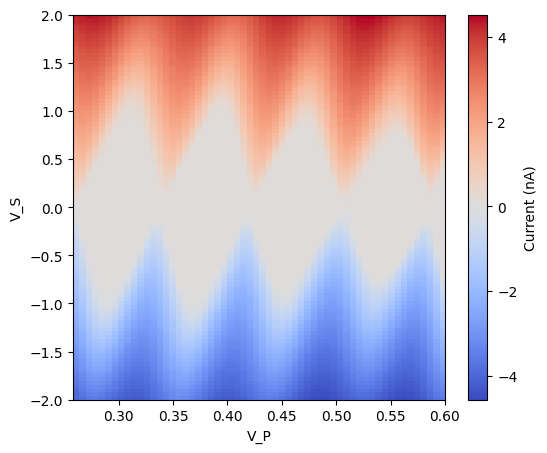

In [42]:
from utils import extract_bias_point, get_data_from_qcodes_db
from miner import Miner
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Replace with your actual file path
file_path = 'C:\\Users\\bennt\\Desktop\\Twente Devices Plots and Data\\df_current_Coulomb_Diamonds_2.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Keep only the first half of the rows
df = df.iloc[:len(df) // 2 + 758]

print(df.tail())

V_P = df['ivvi_P']
V_S = df['ivvi_S'] / 1000
Current = df['keithley2000_current']

# Pivot the data: rows=Y, columns=X, values=Z
grid = df.pivot(index="ivvi_S", columns="ivvi_P", values="keithley2000_current")

# Plot heatmap
plt.figure(figsize=(6, 5))
plt.imshow(grid.values *1e9, 
           cmap='coolwarm', 
           origin='lower', 
           aspect='auto', 
           extent=[grid.columns.min(), grid.columns.max(), grid.index.min()/1000, grid.index.max()/1000])

plt.colorbar(label='Current (nA)')
plt.xlabel('V_P')
plt.ylabel('V_S')
plt.title('')
plt.show()

In [5]:
# Convert axes to arrays
lb_data = grid.columns.to_numpy()  # this is V_P (X axis)
rb_data = grid.index.to_numpy() / 1000  # this is V_S (Y axis), converted to volts
current_data = grid.to_numpy()  # 2D array of current values

print(lb_data)
print(rb_data)
print(current_data)

[0.258 0.264 0.27  0.276 0.282 0.288 0.294 0.3   0.306 0.312 0.318 0.324
 0.33  0.336 0.342 0.348 0.354 0.36  0.366 0.372 0.378 0.384 0.39  0.396
 0.402 0.408 0.414 0.42  0.426 0.432 0.438 0.444 0.45  0.456 0.462 0.468
 0.474 0.48  0.486 0.492 0.498 0.504 0.51  0.516 0.522 0.528 0.534 0.54
 0.546 0.552 0.558 0.564 0.57  0.576 0.582 0.588 0.594 0.6  ]
[-2.   -1.96 -1.92 -1.88 -1.84 -1.8  -1.76 -1.72 -1.68 -1.64 -1.6  -1.56
 -1.52 -1.48 -1.44 -1.4  -1.36 -1.32 -1.28 -1.24 -1.2  -1.16 -1.12 -1.08
 -1.04 -1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6
 -0.56 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12
 -0.08 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36
  0.4   0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84
  0.88  0.92  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32
  1.36  1.4   1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8
  1.84  1.88  1.92  1.96  2.  ]
[[-3.98971392e-09 -3.75861904e-09

In [6]:
extract_bias_point(lb_data, rb_data, current_data, threshold = 20, minLineLength = 10, maxLineGap = 50)

[]

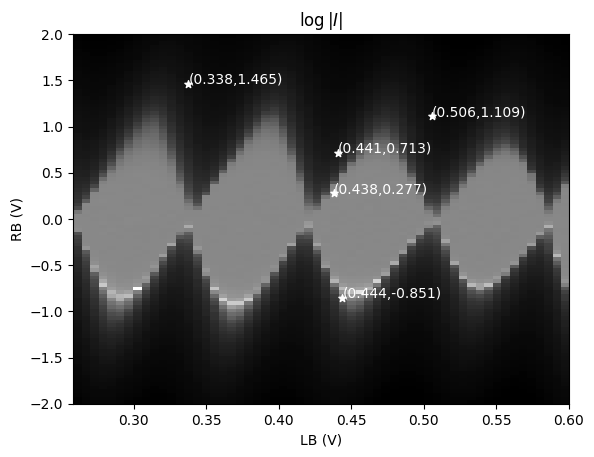

Detected bias points: [(np.float64(0.444), np.float64(-0.851)), (np.float64(0.338), np.float64(1.465)), (np.float64(0.438), np.float64(0.277)), (np.float64(0.506), np.float64(1.109)), (np.float64(0.441), np.float64(0.713))]


In [17]:
bias_points = extract_bias_point(
    lb_data, rb_data, current_data,
    minAngleDeg= -90, maxAngleDeg= 90,
    threshold=10, minLineLength=10, maxLineGap=100,
    debug=False,
    plot_results=True
)
print("Detected bias points:", bias_points)


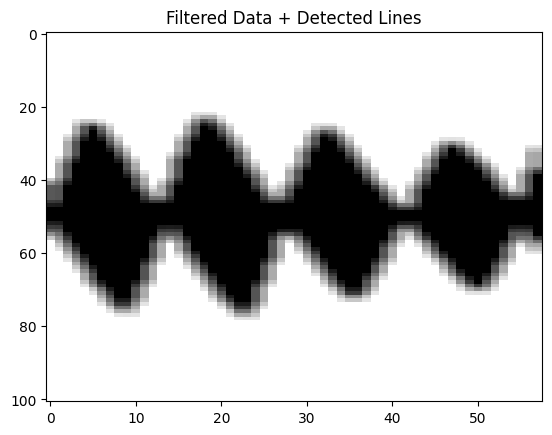

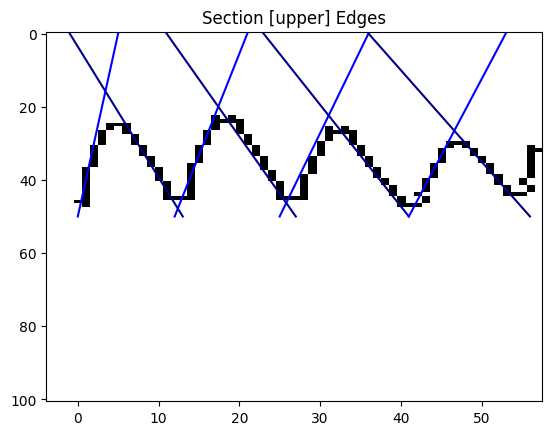

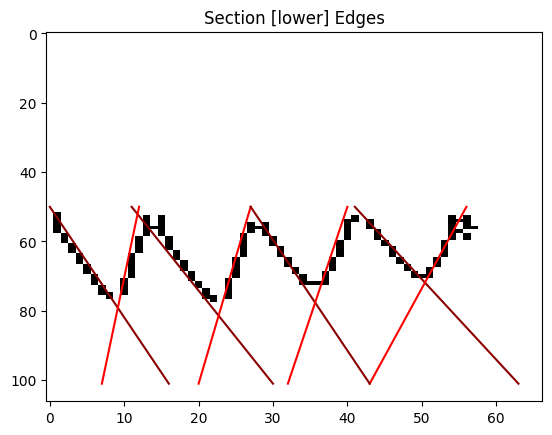

In [38]:
miner = Miner(
    gate_data = lb_data,
    ohmic_data = rb_data / 100,
    current_data = current_data,
    epsR = 3.9,
    oxide_thickness=10e-9,
    binary_threshold=1.17,
    blur_sigma=4.0,
    blur_kernel=(3,3)

)
diamond = miner.extract_diamonds(debug=True)

Summary (#0):


Constants
---------
Elementary Charge (e): 1.60218e-19 C
Permittivity of Free Space (ϵ0): 8.85419e-12 F/m
Relative Permittivity (ϵR): 3.90000
Oxide Thickness: 10.00000 nm
---------


Geometry
---------
Left Vertex: [ 2.58000000e-01 -1.98019802e-04]
Top Vertex: [0.31106897 0.01128713]
Right Vertex: [ 3.22862069e-01 -1.98019802e-04]
Bottom Vertex: [ 0.27568966 -0.01405941]
Width: 64.86207 mV
Height: 25.34653 mV
---------


Dot Properties
--------------
Total Lever Arm (α): 0.19539 eV/V
Drain Lever Arm (β): 0.25513 eV/V
Source Lever Arm (γ): 0.87874 eV/V
Addition Voltage: 64.86207 mV
Charging Voltage: 12.67327 mV
Gate Capacitance: 2.47013 aF
Source Capacitance: 2.81100 aF
Drain Capacitance: 7.21163 aF
Total Capacitance: 12.64217 aF
Dot Radius: 34.13731 nm
--------------


Summary (#1):


Constants
---------
Elementary Charge (e): 1.60218e-19 C
Permittivity of Free Space (ϵ0): 8.85419e-12 F/m
Relative Permittivity (ϵR): 3.90000
Oxide Thickness: 10.00000 nm
---------


Geome

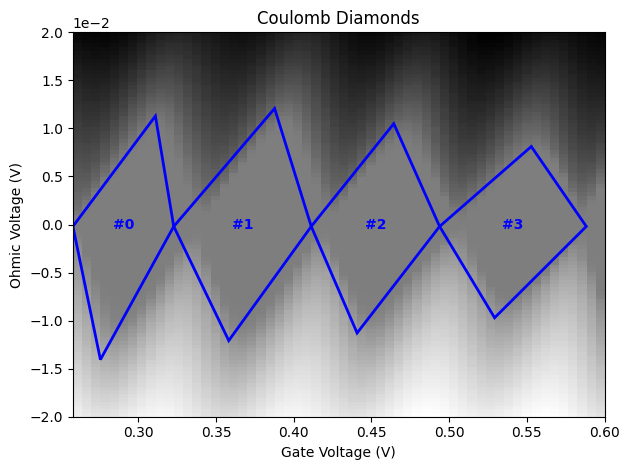

In [39]:
miner.plot_diamonds()


In [40]:
statistics = miner.get_statistics()


Average Lever Arm (α) : 0.13958 eV/V ± 0.00903 eV/V
Average Addition Voltage: 82.55172 mV ± 2.75786 mV
Average Charging Voltage: 11.13861 mV ± 0.35934 mV
Average Total Capacitance: 14.64924 aF ± 0.51607 aF
Average Gate Capacitance: 1.98015 aF ± 0.07391 aF
Average Source Capacitance: 4.75949 aF ± 0.35910 aF
Average Drain Capacitance: 7.80606 aF ± 0.25501 aF
Average Dot Radius: 36.65992 nm ± 0.63332 nm


In [52]:
# Load the data from the txt file
demo_data_loaded = pd.read_csv(f'C:\\Users\\bennt\\Desktop\\demo_data_1.txt', sep='\t', index_col=0)

# Convert the loaded data back to numpy arrays if needed
P_data = demo_data_loaded.columns.to_numpy().astype(float)
S_data = demo_data_loaded.index.to_numpy().astype(float)
I_data = demo_data_loaded.to_numpy().astype(float)

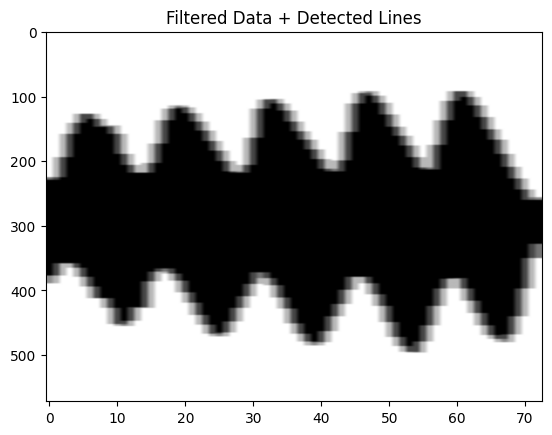

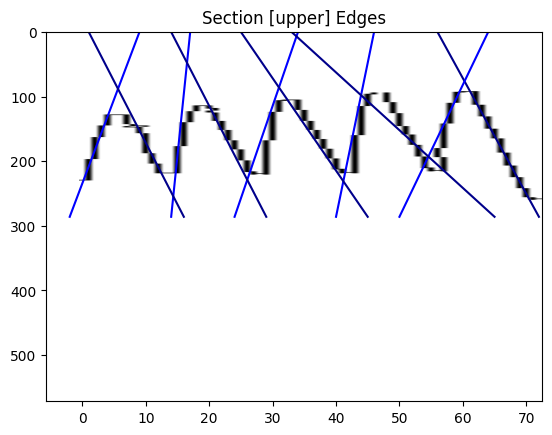

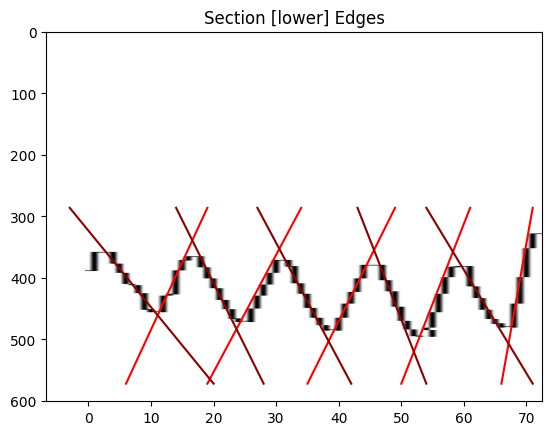

In [60]:
device_voltage_conversion = 1e-2 # Data might have voltage divider connect to source on device
current_sensitivity = 1 # If your data is in volts need to convert using sensitivity

# Can crop by index if desired to isolate diamonds of interest
crop_left = 0 
crop_right = -1

miner = Miner(
    gate_data=P_data[crop_left:crop_right], # Volts
    ohmic_data=S_data[:] * device_voltage_conversion, # Volts
    current_data=I_data[:, crop_left:crop_right] * current_sensitivity, # Ampheres
    # Material properties below are OPTIONAL!
    # They allow for the estimation of dot radius.
    epsR = 3.9, # SiO2
    oxide_thickness = 10e-9, #nm,
    # Tunables for pre-filtering the data
    binary_threshold=1.09, # > 1
    blur_sigma=1.,
    blur_kernel=(3,3),
)
diamonds = miner.extract_diamonds(debug = True)

Summary (#0):


Constants
---------
Elementary Charge (e): 1.60218e-19 C
Permittivity of Free Space (ϵ0): 8.85419e-12 F/m
Relative Permittivity (ϵR): 3.90000
Oxide Thickness: 10.00000 nm
---------


Geometry
---------
Left Vertex: [0.135 0.   ]
Top Vertex: [0.18924658 0.01216783]
Right Vertex: [0.2089726 0.       ]
Bottom Vertex: [ 0.15965753 -0.01384615]
Width: 73.97260 mV
Height: 26.01399 mV
---------


Dot Properties
--------------
Total Lever Arm (α): 0.17584 eV/V
Drain Lever Arm (β): 0.25254 eV/V
Source Lever Arm (γ): 0.58919 eV/V
Addition Voltage: 73.97260 mV
Charging Voltage: 13.00699 mV
Gate Capacitance: 2.16591 aF
Source Capacitance: 3.67607 aF
Drain Capacitance: 6.41066 aF
Total Capacitance: 12.31781 aF
Dot Radius: 33.69653 nm
--------------


Summary (#1):


Constants
---------
Elementary Charge (e): 1.60218e-19 C
Permittivity of Free Space (ϵ0): 8.85419e-12 F/m
Relative Permittivity (ϵR): 3.90000
Oxide Thickness: 10.00000 nm
---------


Geometry
---------
Left Vertex: [0.20

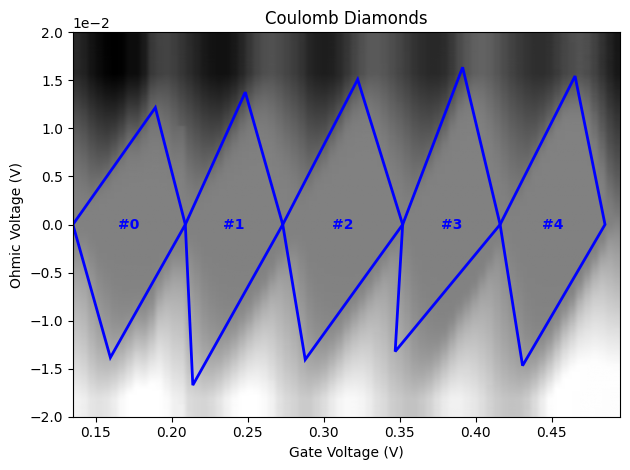

In [61]:
miner.plot_diamonds()

In [ ]:
statistics = miner.get_statistics()

Average Lever Arm (α) : 0.20948 eV/V ± 0.00496 eV/V
Average Addition Voltage: 70.02740 mV ± 1.15022 mV
Average Charging Voltage: 14.53846 mV ± 0.15980 mV
Average Total Capacitance: 11.05607 aF ± 0.13039 aF
Average Gate Capacitance: 2.30306 aF ± 0.03691 aF
Average Source Capacitance: 1.57141 aF ± 0.43335 aF
Average Drain Capacitance: 5.77864 aF ± 0.06714 aF
Average Dot Radius: 31.91071 nm ± 0.18496 nm
